In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r'D:\ML Projects\bank-full.csv')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

## Exploratory Data Analysis

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.shape

(45211, 17)

In [5]:
df.drop_duplicates().shape

(45211, 17)

In [6]:
print(df[df['job']== 'unknown'].shape)
print(df[df['education']== 'unknown'].shape)
print(df[df['contact']== 'unknown'].shape)
print(df[df['poutcome']== 'unknown'].shape)

(288, 17)
(1857, 17)
(13020, 17)
(36959, 17)


(array([4.519e+04, 1.800e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  27.5,  55. ,  82.5, 110. , 137.5, 165. , 192.5, 220. ,
        247.5, 275. ]),
 <a list of 10 Patch objects>)

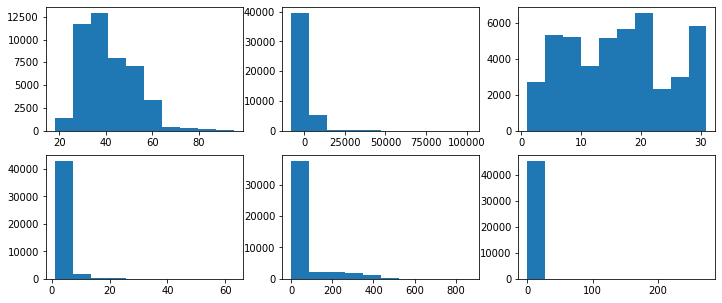

<Figure size 864x360 with 0 Axes>

In [7]:
num_variables=df[['age','balance','day','duration','campaign','pdays','previous']]
fig,ax=plt.subplots(2,3,sharex=False, sharey=False,figsize=(12,5))
plt.figure(figsize=(12,5))
ax[0][0].hist(df.age)
ax[0][1].hist(df.balance)
ax[0][2].hist(df.day)
ax[1][0].hist(df.campaign)
ax[1][1].hist(df.pdays)
ax[1][2].hist(df.previous)

#### 1. From the graphs we can see that p days has about 80% of '-1' value which can we considered as unknown.So we drop it
#### 2. Also the campaign and previous columns have some outliers . So we impute the outliers with the mean of columns.

In [9]:
fig,ax=plt.subplots()
ax.hist(df['age'],histtype='step',bins=10)

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 1 Patch objects>)

In [10]:
df.groupby('marital')["y"].count().plot(kind='bar')

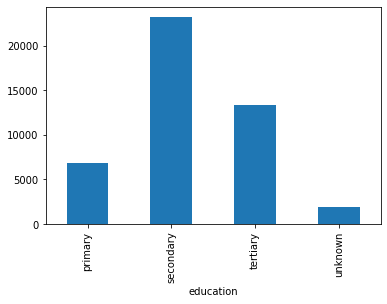

In [11]:
df.groupby('education')["y"].count().plot(kind='bar')

In [12]:
df.groupby('job')["y"].count().plot(kind='bar')

In [13]:
df.groupby('default')["y"].count().plot(kind='bar')

## Data Cleaning(Task1)


In [14]:
def dummies(data):
  # To get all the categorical variables
  return pd.get_dummies(data,drop_first= True)

def imputer(row,column,threshold,data):
  if data.loc[row,column ] <= threshold:
    return data.loc[row,column]   
  else:
    data.loc[row,column] = df.column.mean()  
    return data.loc[row,column]

def clean_data(data):

  clean_df=df.copy()

  #drop irrelevant columns
  clean_df = clean_df.drop(['pdays'],axis=1)

  #Convert the categorical variables
  clean_df= dummies(df)

  #impute
  clean_df['campaign']= df['campaign'].apply(lambda row:imputer(row,'campaign',32, clean_df ))
  clean_df['previous']= df['previous'].apply(lambda row:imputer(row,'previous',24, clean_df ))

  clean_df=clean_df.drop(['pdays'],axis=1)

  return clean_df

cleaned_df=clean_data(df)
cleaned_df

age  balance  day  duration  campaign  previous  job_blue-collar  \
0       58     2143    5       261         1         0                0   
1       44       29    5       151         1         0                0   
2       33        2    5        76         1         0                0   
3       47     1506    5        92         1         0                1   
4       33        1    5       198         1         0                0   
...    ...      ...  ...       ...       ...       ...              ...   
45206   51      825   17       977         1         0                0   
45207   71     1729   17       456         1         0                0   
45208   72     5715   17      1127         1         0                0   
45209   57      668   17       508         1         0                1   
45210   37     2971   17       361         1         0                0   

       job_entrepreneur  job_housemaid  job_management  ...  month_jun  \
0                     0              0               1  ...          0   
1                     0              0               0  ...          0   
2                     1              0               0  ...          0   
3                     0              0               0  ...          0   
4                     0              0               0  ...          0   
...                 ...            ...             ...  ...        ...   
45206                 0              0               0  ...          0   
45207                 0              0               0  ...          0   
45208                 0              0               0  ...          0   
45209                 0              0               0  ...          0   
45210                 1              0               0  ...          0   

       month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0              0          1          0          0          0               0   
1              0          1          0          0          0               0   
2              0          1          0          0          0               0   
3              0          1          0          0          0               0   
4              0          1          0          0          0               0   
...          ...        ...        ...        ...        ...             ...   
45206          0          0          1          0          0               0   
45207          0          0          1          0          0               0   
45208          0          0          1          0          0               0   
45209          0          0          1          0          0               0   
45210          0          0          1          0          0               1   

       poutcome_success  poutcome_unknown  y_yes  
0                     0                 1      0  
1                     0                 1      0  
2                     0                 1      0  
3                     0                 1      0  
4                     0                 1      0  
...                 ...               ...    ...  
45206                 0                 1      1  
45207                 0                 1      1  
45208                 1                 0      1  
45209                 0                 1      0  
45210                 0                 0      0  

[45211 rows x 42 columns]

In [15]:
X=cleaned_df.iloc[:,:-1].values
y=cleaned_df.iloc[:,-1].values 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import warnings
warnings.filterwarnings('ignore')

### Training the Logistic Regression model and finding accuracy

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9705  273]
 [ 854  471]]


0.9002919578872866

### Training the SVM model and finding accuracy

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9823  155]
 [1083  242]]


0.8904715562240113

### Training the Random Forest model and finding accuracy

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9680  298]
 [ 820  505]]


0.9010882066707954

### Training the KNN model and finding accuracy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### Training the Decision Tree model and finding accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## Trainer function(Task 2)

In [25]:
def train_model(X_train,y_train,data):
    
  #Data Preprocessing
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  #X_test = sc.transform(X_test)
  return logistic_regression(X_train,y_train,data)
  
  
  #logistic regression
def logistic_regression(X_train,y_train,data):
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  reslg=classifier.fit(X_train, y_train)
  return reslg

X=cleaned_df.iloc[:,:-1].values
y=cleaned_df.iloc[:,-1].values   
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 



In [26]:
train_model(X_train,y_train,cleaned_df)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Since we have maximum accuracy for logistic regression model, we construct the trainer and tester function on that model

## Tester function(Task 3)

In [27]:
def test_function(X_test,y_test,data):
    
    from sklearn.metrics import confusion_matrix, accuracy_score
    y_pred = logistic_regression(X_test,y_test,data).predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
   
    return cm,accuracy_score(y_test, y_pred)

In [28]:
test_function(X_test,y_test,cleaned_df)

(array([[9730,  248],
        [ 877,  448]], dtype=int64), 0.9004689020613996)